In [0]:
##### target variable imputation

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [0]:
df = pd.read_csv('/content/final_data.csv')

In [0]:
## add new features
df['date'] = pd.to_datetime(df['date'])
df['dayofweek'] = df['date'].dt.dayofweek
df['dayofmonth'] = df['date'].dt.day

In [0]:
feat_cols = ['dayofweek','dayofmonth','frequency_communication','frequency_games & entertainment','frequency_lifestyle','frequency_news & information outlet',
    'frequency_social network','frequency_utility & tools',
    'cat_duration_communication', 'cat_duration_games & entertainment','cat_duration_lifestyle','cat_duration_news & information outlet', 
    'cat_duration_social network',	'cat_duration_utility & tools',
    'dur_pro_communication','dur_pro_games & entertainment','dur_pro_lifestyle','dur_pro_news & information outlet',	'dur_pro_social network',	
    'dur_pro_utility & tools',
    'freq_pro_communication','freq_pro_games & entertainment','freq_pro_lifestyle','freq_pro_news & information outlet','freq_pro_social network',
    'freq_pro_utility & tools','recency_communication','recency_games & entertainment','recency_lifestyle',
    'recency_news & information outlet','recency_social network','recency_utility & tools','monetary_communication','monetary_games & entertainment',
    'monetary_lifestyle','monetary_news & information outlet','monetary_social network','monetary_utility & tools','earliest_time_communication',
    'earliest_time_games & entertainment',  'earliest_time_lifestyle',  'earliest_time_news & information outlet',  
    'earliest_time_social network',  'earliest_time_utility & tools','max_duration_communication',
    'max_duration_games & entertainment','max_duration_lifestyle','max_duration_news & information outlet','max_duration_social network',
    'max_duration_utility & tools','std_duration_communication','std_duration_games & entertainment','std_duration_lifestyle','std_duration_news & information outlet',
    'std_duration_social network','std_duration_utility & tools','min_duration_communication','min_duration_games & entertainment','min_duration_lifestyle',
    'min_duration_news & information outlet','min_duration_social network','min_duration_utility & tools','var_duration_communication','var_duration_games & entertainment',
    'var_duration_lifestyle','var_duration_news & information outlet','var_duration_social network','var_duration_utility & tools']

target_cols = [
    'anxious', 'bored', 'gloomy', 'stressed', 'upset', 'tired', 'envious',
    'inferior'
]

In [0]:
x = df[target_cols].values

In [0]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [0]:
km_scores= []
km_silhouette = []
vmeasure_score =[]
db_score = []
for i in range(2,9):
    km = KMeans(n_clusters=i, random_state=0).fit(x)
    preds = km.predict(x)    
    silhouette = silhouette_score(x,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))

Silhouette score for number of cluster(s) 2: 0.42469288582816334
Silhouette score for number of cluster(s) 3: 0.2921078938250449
Silhouette score for number of cluster(s) 4: 0.22185167949208814
Silhouette score for number of cluster(s) 5: 0.22580563020256636
Silhouette score for number of cluster(s) 6: 0.22703269051695812
Silhouette score for number of cluster(s) 7: 0.2106670420173592
Silhouette score for number of cluster(s) 8: 0.21114196099072696


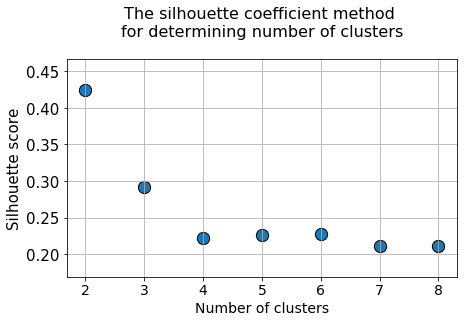

In [0]:
plt.figure(figsize=(7,4))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,9)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,9)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

In [0]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(x)
y = kmeans.predict(x)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


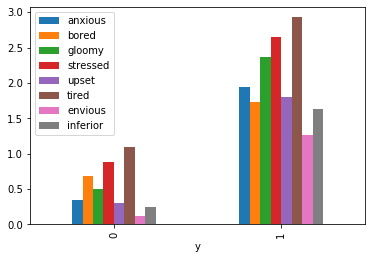

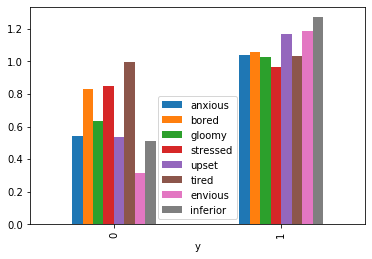

In [0]:
#plot the mean plot for each label
df2 = df[target_cols]
df2['y'] = y
df2.groupby('y').mean().plot.bar()
df2.groupby('y').std().plot.bar()

In [0]:
###training

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df[feat_cols].values,
                                                    y,
                                                    test_size=0.2,
                                                    shuffle=True,random_state = 0)

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [0]:
rf = RandomForestClassifier(n_estimators=50,max_depth=5)
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [0]:
from sklearn.metrics import classification_report
print('classification on training set')
print('____________________________________________')
print(classification_report(y_train, y_train_pred))
print()

print('classification on test set')
print('____________________________________________')
print(classification_report(y_test,y_test_pred))
print('accuracy score')
print(accuracy_score(y_test,y_test_pred))

classification on training set
____________________________________________
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      1300
           1       0.99      0.18      0.30       512

    accuracy                           0.77      1812
   macro avg       0.87      0.59      0.58      1812
weighted avg       0.82      0.77      0.70      1812


classification on test set
____________________________________________
              precision    recall  f1-score   support

           0       0.70      0.98      0.82       306
           1       0.78      0.12      0.21       147

    accuracy                           0.70       453
   macro avg       0.74      0.55      0.51       453
weighted avg       0.73      0.70      0.62       453

accuracy score
0.7041942604856513
